In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# constants 
path = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 2

idxLength = 28
idxGain = 29

In [13]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

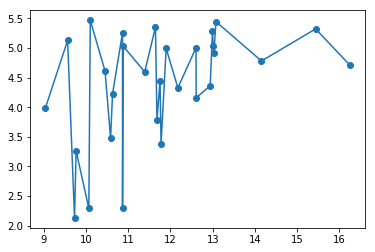

[1.       3.989211 5.127702 2.132044 3.262086 2.291342 5.468494 4.611268
 3.478986 4.230283 5.258255 2.291342 5.031636 4.597239 5.351921 3.781417
 4.446666 3.380638 4.992893 4.327614 5.003229 4.160826 4.362133 5.294152
 5.03226  4.91857  5.44571  4.780945 5.32215  4.712627]
[-1.        9.038497  9.563975  9.727732  9.766096 10.0666   10.10103
 10.4503   10.58083  10.62892  10.86404  10.86427  10.87893  11.38924
 11.64445  11.67968  11.75303  11.77638  11.89787  12.17424  12.60447
 12.60785  12.94045  12.99427  13.01095  13.02924  13.07602  14.15502
 15.4361   16.24544 ]
Optimal lenght:  4.938574


In [14]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 3 values of gain
print(lengths)
print(gain)
avg = sum(lengths[-3:]) / 3
print("Optimal lenght: ", avg)